In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_digits
from sklearn.cross_validation import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [2]:
df = load_digits()
X = df.data
y = df.target

In [3]:
tree = DecisionTreeClassifier( random_state=0)
acc = cross_val_score(tree,X,y,cv=10).mean()
print(acc)

0.8303337234738853


In [4]:
bagg = BaggingClassifier(tree,n_estimators=100,random_state=0)
acc1 = cross_val_score(bagg,X,y,cv=10).mean()
print(acc1)

0.9243136920825039


In [5]:
bagg1 = BaggingClassifier(tree,n_estimators=100,max_features=int(X.shape[1]**0.5),random_state=0)
acc2 = cross_val_score(bagg1,X,y,cv=10).mean()
print(acc2)

0.9365281294303756


In [6]:
tree2 = DecisionTreeClassifier(max_features=int(X.shape[1]**0.5), random_state=0)
bagg2 = BaggingClassifier(tree2,n_estimators=100,random_state=0)
acc3 = cross_val_score(bagg2,X,y,cv=10).mean()
print(acc3)

0.9544773623165452


In [10]:
rfc = RandomForestClassifier(n_estimators=100, max_features=int(X.shape[1]**0.5), random_state=0)
accrfc = cross_val_score(rfc,X,y,cv=10).mean()
print(accrfc)

0.9506154156838471


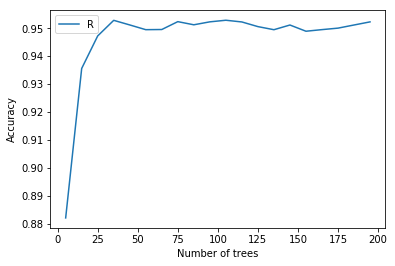

In [20]:
n_est = np.arange(5,200,10)
acc_n_est = []
for n in n_est:
    rfc = RandomForestClassifier(n_estimators=n, max_features=int(X.shape[1]**0.5), random_state=0)
    acc_n_est.append(cross_val_score(rfc,X,y,cv=10).mean())
plt.plot(n_est,acc_n_est)
plt.xlabel('Number of trees')
plt.ylabel('Accuracy')
plt.title('Random forest classifier')

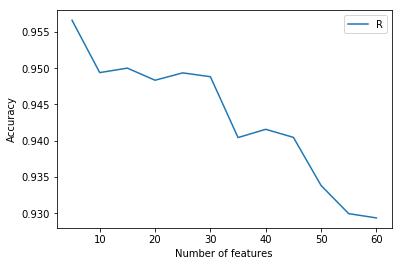

In [21]:
n_feat = np.arange(5,64,5)
acc_n_feat = []
for n in n_feat:
    rfc = RandomForestClassifier(n_estimators=100, max_features=n, random_state=0)
    acc_n_feat.append(cross_val_score(rfc,X,y,cv=10).mean())
plt.plot(n_feat,acc_n_feat)
plt.xlabel('Number of features')
plt.ylabel('Accuracy')
plt.title('Random forest classifier')

Text(0.5,1,'Random forest classifier')

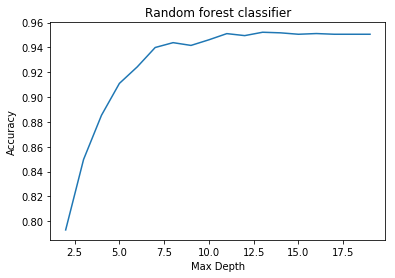

In [22]:
n_depth = np.arange(2,20,1)
acc_n_depth = []
for n in n_depth:
    rfc = RandomForestClassifier(n_estimators=100,max_depth=n, max_features=8, random_state=0)
    acc_n_depth.append(cross_val_score(rfc,X,y,cv=10).mean())
plt.plot(n_depth,acc_n_depth)
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Random forest classifier')

На основе наблюдений выпишите через пробел номера правильных утверждений из приведенных ниже в порядке возрастания номера (это будет ответ в п.5)

1) Случайный лес сильно переобучается с ростом количества деревьев

2) При очень маленьком числе деревьев (5, 10, 15), случайный лес работает хуже, чем при большем числе деревьев

3) С ростом количества деревьев в случайном лесе, в какой-то момент деревьев становится достаточно для высокого качества классификации, а затем качество существенно не меняется.

4) При большом количестве признаков (для данного датасета - 40, 50) качество классификации становится хуже, чем при малом количестве признаков (5, 10). Это связано с тем, что чем меньше признаков выбирается в каждом узле, тем более различными получаются деревья (ведь деревья сильно неустойчивы к изменениям в обучающей выборке), и тем лучше работает их композиция.

5) При большом количестве признаков (40, 50, 60) качество классификации лучше, чем при малом количестве признаков (5, 10). Это связано с тем, что чем больше признаков - тем больше информации об объектах, а значит алгоритм может делать прогнозы более точно.

6) При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса намного лучше, чем без ограничения глубины, т.к. деревья получаются не переобученными. С ростом глубины деревьев качество ухудшается.

7) При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса заметно хуже, чем без ограничений, т.к. деревья получаются недообученными. С ростом глубины качество сначала улучшается, а затем не меняется существенно, т.к. из-за усреднения прогнозов и различий деревьев их переобученность в бэггинге не сказывается на итоговом качестве (все деревья преобучены по-разному, и при усреднении они компенсируют переобученность друг-друга).

2 3 4 7